In [1]:
import warnings
from jw_package import *
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

import configuration completed !
train + key + weather merging started
train + key + weather merging finished
function configuration completed ! 
Good to go !


In [2]:
df_1.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,year,month,day,store_nbr,item_nbr,units
0,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,2012,1,1,1,1,0
1,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,2012,1,1,1,2,0
2,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,2012,1,1,1,3,0
3,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,2012,1,1,1,4,0
4,1,2012-01-01,52,31,42,M,36,40,23,0,...,29.92,3.6,20,4.6,2012,1,1,1,5,0


In [3]:
len(df_1)

4617600

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4617600 entries, 0 to 4617599
Data columns (total 26 columns):
station_nbr    int64
date           datetime64[ns]
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
year           int64
month          int64
day            int64
store_nbr      int64
item_nbr       int64
units          int64
dtypes: datetime64[ns](1), int64(7), object(18)
memory usage: 951.2+ MB


1. 본격적으로 회귀를 시작하기 앞서, 우리가 가지고 있는 데이터에 대해 파악했음.
2. 총 45개 store, 20개 station, 각 station마다 여러 개의store의 weather data를 관측. weather data는 2012년 2월부터 2014년까지 10월까지 있음.
3. 아이템 종류를 의미하는 item_nbr, 각 item_nbr마다 판매량을 나타내는 units가 있다. 총 item_nbr는 111개지만 모든 store에서 111개가 전부 팔리진 않고 한 store당 4~5개 정도 팔림. 우리가 예측해야 할 예측치는 45 X 5
4. 판매량과 날씨 데이터를 결합했을때 총 데이터 수는 460만개
-------------------
------------------- 
EDA 시작
1. 우리는 units의 예측치이므로 이 units에 대해 어떻게 접근할 지 고민했음
2. 일단 각 store의 연도별 units 경향을 살펴보기로 함

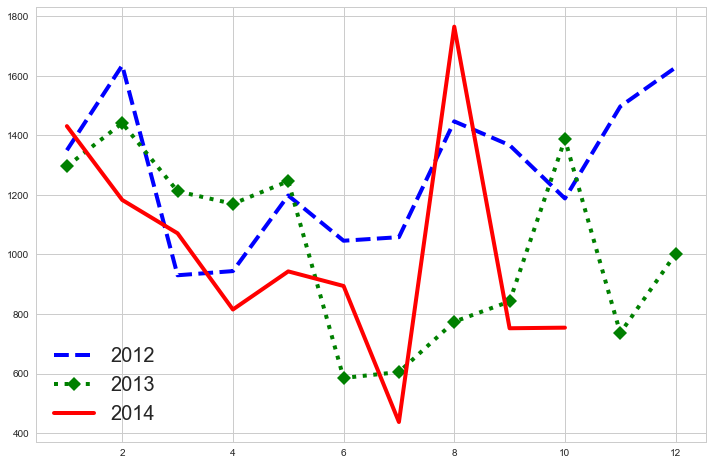

In [5]:
show_tendency(1)

위 plot은 2번 store에서의 units경향이다.

2013년과 2014년에서 units가 떨어진 것으로 보아, 

이 시점에서의 weather를 비교해보면 뭔가 insight를 얻을 수 있지 않을까, 그래서 해당 store에서 item_nbr는 뭐가 팔렸고 얼마나 팔렸는지 찍어봤다

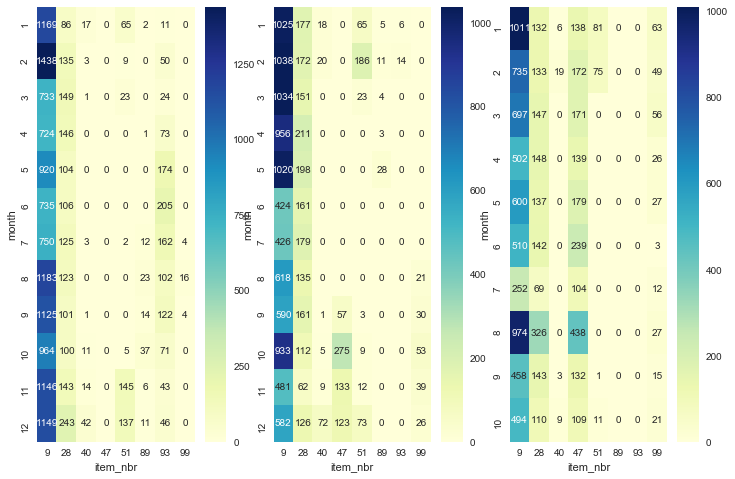

In [6]:
item_nbr_tendency(1)

위 plot은 해당 store에서 한번이라도 팔린 item에 대한 units를 year, month별로 출력한 것이다.

어떤 item_nbr의 units가 떨어졌는지 확인할 순 있지만 month별로 출력했기 때문에 각 day별로는 확인할 수 없다.

day별로 확인할 수 없다면 weather feature가 각 날짜에 얼마나 영향을 미쳤는지 정확히 조사할 수 없다.

따라서 day별로 plot을 찍어봤다

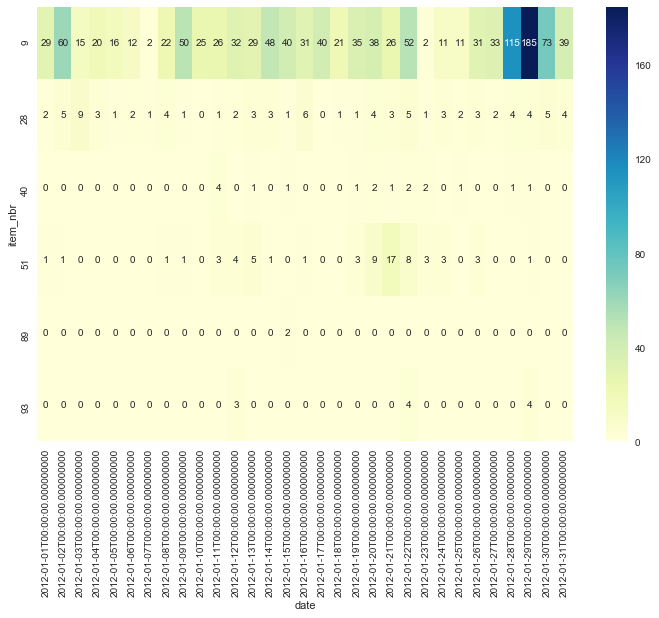

date,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2012-01-22 00:00:00,2012-01-23 00:00:00,2012-01-24 00:00:00,2012-01-25 00:00:00,2012-01-26 00:00:00,2012-01-27 00:00:00,2012-01-28 00:00:00,2012-01-29 00:00:00,2012-01-30 00:00:00,2012-01-31 00:00:00
item_nbr,,,,,,,,,,,,,,,,,,,,,
9,29.0,60.0,15.0,20.0,16.0,12.0,2.0,22.0,50.0,25.0,...,52.0,2.0,11.0,11.0,31.0,33.0,115.0,185.0,73.0,39.0
28,2.0,5.0,9.0,3.0,1.0,2.0,1.0,4.0,1.0,0.0,...,5.0,1.0,3.0,2.0,3.0,2.0,4.0,4.0,5.0,4.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
51,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,8.0,3.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0


In [7]:
item_nbr_tendency_finely(1,2012,1)

각 day별로 해당 item_nbr와 date, units를 pivot하여 찍은 plot이다.

각 날짜에 어떤 units변화가 일어났는지 weather와 같이 비교해볼 수 있는 형태가 됬고, 아래의 plot은 위와 똑같은 기간의 weather 데이터다.



In [8]:
weather_tendency(1,2012).head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,store_nbr
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,1,2012-01-01,52,31,42,M,36,40,23,0,...,0.05,29.78,29.92,3.6,20,4.6,2012,1,1,1
2012-01-02,1,2012-01-02,50,31,41,M,26,35,24,0,...,0.01,29.44,29.62,9.8,24,10.3,2012,1,2,1
2012-01-03,1,2012-01-03,32,11,22,M,4,18,43,0,...,0.00,29.67,29.87,10.8,31,11.6,2012,1,3,1
2012-01-04,1,2012-01-04,28,9,19,M,-1,14,46,0,...,0.00,29.86,30.03,6.3,27,8.3,2012,1,4,1
2012-01-05,1,2012-01-05,38,25,32,M,13,25,33,0,...,0.00,29.67,29.84,6.9,25,7.8,2012,1,5,1


units의 변화량에 대해 각 날짜별로 비교할 수 있지만, 

일일이 비교해서 유의미한 insight를 도출하기엔 비현실적이다.

그래서 아래와 같이 입력받은 스토어에 대해서,

모든 item_nbr에 대한 weather feature VS units의 피어슨 상관계수를 구한 것이 아래다

In [9]:
cor = get_correlation(1,2012)

In [10]:
show_me_pearson(trim_correlation(cor))

(1, 2012, -1, -2)
	 ((99, 'cool', 362), (0.23360735334567914, 7.0686857495894558e-06))
	 ((99, 'wetbulb', 360), (0.22639519766547406, 1.4440842669249175e-05))
	 ((99, 'dewpoint', 363), (0.22037814773777978, 2.2704690497583713e-05))
	 ((99, 'tmin', 364), (0.21596943064827212, 3.2471288574920153e-05))
	 ((99, 'tavg', 362), (0.21407692268563641, 4.0133159063757517e-05))
	 ((99, 'heat', 362), (-0.18171028709217207, 0.00051221897840355245))
	 ((40, 'heat', 362), (0.34992110266857479, 7.2561712206726976e-12))
	 ((40, 'tavg', 362), (-0.33489777191229109, 6.1673670092993148e-11))
	 ((40, 'tmin', 364), (-0.30542826661212402, 2.6825967727965087e-09))
	 ((40, 'wetbulb', 360), (-0.29821823918217327, 7.9065225532450263e-09))
	 ((40, 'dewpoint', 363), (-0.25763556532294596, 6.4933384743597965e-07))
	 ((40, 'cool', 362), (-0.17878773214082763, 0.00063203918882930282))
	 ((9, 'heat', 362), (0.19621037229892041, 0.00017208151618507012))
	 ((9, 'tavg', 362), (-0.17774820347368961, 0.00068057932224126671

# EDA 끝